
## Comparision of various clustering techniques on spatial data
### Subsurface Machine Learning Course

#### [Anu Radhakrishnan](https://www.linkedin.com/in/anuradha495/)
#### PhD Candidate
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)
___________________

## Comparing different clustering techniques on spatial data

### Summary

Clustering is a very important technique in unsupervised machine learning which groups datapoints into clusters based on the similarity of information available. The algorithm groups similar datapoints into the same cluster. When given a dataset to pre-process for applying machine learning methods, one needs to know what type of clustering technique provides the best result for the given dataset. 

K-means, affinity propagation and DBSCAN (Density Based Spatial Clustering of Applications with Noise) are the most popular clustering algorithms in unsupervised machine learning. In this workflow, we compare and contrast the above methods for a given spatial dataset and provide redomendatrions on which method to select.


### Some Useful Definitions


**K-Means Clustering :**
K-means is a centroid-based or partition-based clustering algorithm technique.  This algorithm separates all the points in the dataset into K groups based on their nearness, which is calculated using Euclidian Distance.

**DBScan Clustering :**
DBScan is a density-based clustering algorithm technique. The goal of this alogorithm is to allocate each point in a cluster which is within a given radius (eps) must have a minimum number of points (min_sample). The algorithm is efficient in detecting outliers and handling noisy datasets.

**Affinity Propagation Clustering :**
The data behave like a network where they send messages to all the other datapoints. The messages contain the willingness of the points being exemplars. Exemplars are points that explain the other data points ‘best’ and are the most significant of their cluster. A cluster only has one exemplar. All the data points want to collectively determine which data points are an exemplar for them. These messages are stored in two matrices: responsibility matrix and availability matrix.

In [1]:
#please install these libraries if needed
#pip install geopandas          
#conda install xlrd
#conda install openpyxl
#pip install ipywidgets

#import packages
import pandas as pd                                #pandas dataframe
import matplotlib.pyplot as plt                    # to plot the graphs
import numpy as np                                 #arrays
import copy                                        
import geopandas as gpd                            #To plot hte TX outline
from shapely.geometry import Point, Polygon        #Draw the TX state outlines

#Packages for K means
from numpy import unique                             #arrays
from numpy import where                              #arrays
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans                   #K-means clustering
from matplotlib import pyplot                        # to plot the graphs

#Packages for DBSCAN 
from sklearn.cluster import DBSCAN             # DBSCAN clustering
from sklearn.neighbors import NearestNeighbors # nearest neighbours function to calculate eps hyperparameter
from sklearn.preprocessing import MinMaxScaler # min/max normalization
cmap = plt.cm.inferno
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt                        # to plot the graphs

#Packages for Affinity Propagation
from sklearn.cluster import AffinityPropagation       # AP clustering

                 
from IPython.display import clear_output, display     # widgets and interactivity
import ipywidgets as widgets

## Data loading and visualization

**Load Data**
The following workflow applies the .xlsx file 'SML_ProjectData.xlsx', a synthetic dataset is generated from the global nighttime detections of flares. The dataset is publically available [here](https://eogdata.mines.edu/products/vnl/)

We will work with the following features:
**Latitude and Longitude**: They are angles that uniquely define points on earther. Together, the angles comprise a coordinate scheme that can locate or identify a flare site

Guidance: Only the region of Texas and New Mexico (Permian Basin) are used in the study. Each clustering method is performed in normalized as well as origianl units.


In [2]:
#load data
excel_file = (r"https://github.com/anuradha495/SML_Project/raw/main/SML_ProjectData.xlsx")
df = pd.read_excel(excel_file)

In [3]:
#Data sample
index_names = df[df['AI']>36].index   # to remove all points outside out region of interest (TX and NM-including Permian Basin)
df.drop(index_names,inplace = True)

index_names = df[df["AI"]<28].index
df.drop(index_names,inplace = True)

index_names = df[df["Porosity"]>-95].index
df.drop(index_names,inplace = True)

index_names = df[df["Porosity"]<-105].index
df.drop(index_names,inplace = True)        

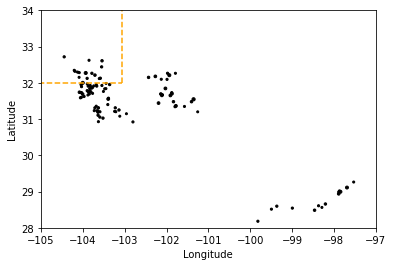

In [4]:
#Data Visualization
list_lat = df['AI'].to_list()
list_long = df['Porosity'].to_list()
markersize1 = df['MarkerSize'].to_list()
plt.scatter(x=list_long,y=list_lat, s=markersize1, c='black')
plt.xlim(-105,-97)
plt.ylim(28,34)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.plot([-108,-103.064], [32,32], color='orange', linestyle="dashed")
plt.plot([-103.064, -103.064], [32, 40], color='orange', linestyle="dashed")
plt.show()

### Visualization of the data

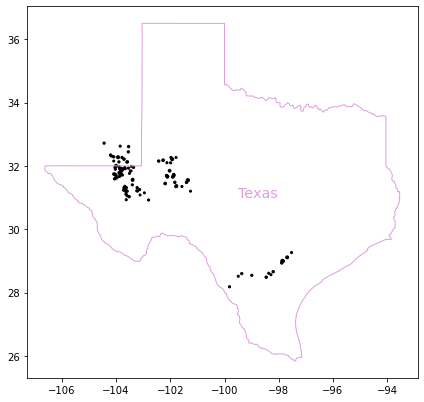

### 1. K-means clustering technique


K-Means attempts to organize the data into a specified number of clusters. The goal of KMeans is to identify similar data points and cluster them together while trying to distance each cluster as far as possible. Its “similarity” calculation is determined via Euclidean distance or an ordinary straight line between two points.

Paraters:
Number of clusters: the number of clusters we wish to find but fear not we have tools at our disposal that assist with this process.

Min distance:min distance between each cluster

### USER INPUT: Number of cluster for K means

IntSlider(value=4, description='N-Clusters:', max=10, min=1)

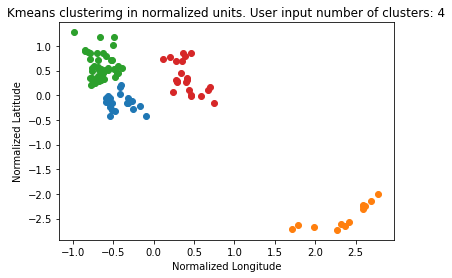

In [5]:
#Normailze the dataset
centers = [[-100, 30], [-102, 33], [-105, 36]]
lst=list()

w=0
for w in range(0, len(df)-1):
    lst+=[[df['Porosity'].iloc[w],df['AI'].iloc[w]]]
X = StandardScaler().fit_transform(lst)

xi = widgets.IntSlider()
xi.min = 1
xi.max =  10
xi.value = 4
xi.description='N-Clusters:'
display(xi)

def show_clusters(*args):

    clear_output(wait=True)
    display(xi)
    # define the model
    model = KMeans(n_clusters=xi.value)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

    # show the plot
    pyplot.title(f"Kmeans clusterimg in normalized units. User input number of clusters: {xi.value}")
    pyplot.ylabel("Normalized Latitude")
    pyplot.xlabel("Normalized Longitude")
    pyplot.show()
    
show_clusters()
    
xi.observe(show_clusters,'value')

IntSlider(value=4, description='N-Clusters:', max=10, min=1)

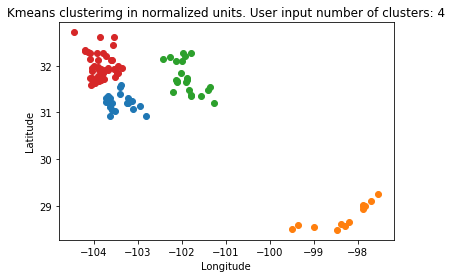

In [6]:
# In Original units:
X_orig= list()
Y_orig=list()

for val in lst:
    X_orig+=[val[0]]
    Y_orig+=[val[1]]
  
X=np.array(lst)




xi = widgets.IntSlider()
xi.min = 1
xi.max =  10
xi.value = 4
xi.description='N-Clusters:'
display(xi)

def show_clusters(*args):
    
    clear_output(wait=True)
    display(xi)
    # define the model
    model = KMeans(n_clusters=xi.value)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

    # show the plot
    pyplot.title(f"Kmeans clusterimg in normalized units. User input number of clusters: {xi.value}")
    pyplot.ylabel("Latitude")
    pyplot.xlabel("Longitude")
    pyplot.show()
    
show_clusters()
    
xi.observe(show_clusters,'value')

**Comments:**
    
The above figure shows normalized data with number of clusters specified by the user (default value is n=4).
The algorithm is fairly simple and not as effective in handling outliers. Therefore, may not be the best clustering method for noisy data. Lets us explore two other clustering techniuqes.

### 2. DBSCAN technique

The DBSCAN approach randomly finds clusters of samples (high density) is well suited to working with data with an arbitrary (even non-convex) shape and with noise.

The two parameters include:

* **eps** - maximum distance between to samples in features space for a sample to be included in the neighbourhood of the other sample. Too small a value will result in many clusters and outliers, and too large a value will result in one cluster with all the data together.

* **min_samples** - minimum number of samples in a neighbourhood to spawn a new cluster. Use a larger value for noisy data to prevent identifying clusters due to a few outliers.

We now perform DBSCAN to our dataset to compare with k-means clustering.

Text(0.5, 1.0, 'Estimated number of clusters: 3')

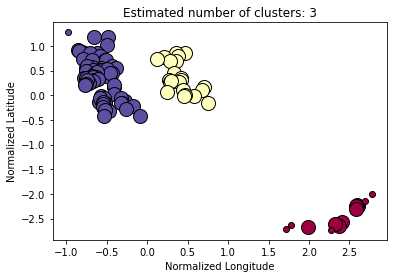

In [7]:
#Normailze the dataset
centers = [[-100, 30], [-102, 33], [-105, 36]]
lst=list()
w=0

for w in range(0, len(df)-1):
    lst+=[[df['Porosity'].iloc[w],df['AI'].iloc[w]]]
X = StandardScaler().fit_transform(lst)
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy1 = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy1[:, 0],
        xy1[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy1 = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy1[:, 0],
        xy1[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.ylabel("Normalized Latitude")
    plt.xlabel("Normalized Longitude")
    plt.plot()
plt.title("Estimated number of clusters: %d" % n_clusters_)



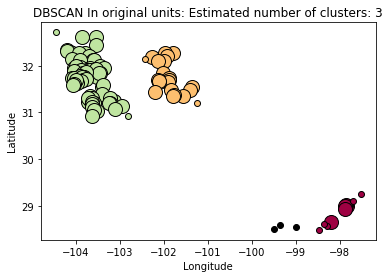

In [8]:
# In Original units:
X_orig= list()
Y_orig=list()

for val in lst:
    X_orig+=[val[0]]
    Y_orig+=[val[1]]
  
X=np.array(lst)
db = DBSCAN(eps=0.5, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy1 = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy1[:, 0],
        xy1[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy1 = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy1[:, 0],
        xy1[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.plot()
plt.title("DBSCAN In original units: Estimated number of clusters: %d" % n_clusters_)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

**Comments:**

The number of clusters was automatically optimized by the algorithm. The shape of clusters are not necessarily spherical. Choosing a meaningful εps can be difficult when the data and scale are not well described. Very effective in handling outliers in case of noisy data.

### 3. Affinity Propagation


The K-means (KM) algorithms clusters the data into n clusters of equal variance minimizing the within-cluster Euclidean distance. As an input the algorithm requires the samples and the number of clusters.

The affinity propagation (AP) algorithm forms clusters by sending messages between pairs of instances until convergence. The dataset is described as the number of exemplars, which are identified as those most representative of other samples. In contrary to K-means, Affinity Propagation chooses the number of clusters based on the data.

**Comments:**
    
Affinity Propagation is an unsupervised machine learning algorithm that is particularly well suited for problems where the optimal number of clusters is unknown. Pairwise comparision along with sharing of information is done.

For this dataset, 2 is selected as the potimized number of clusters by the algorithm.

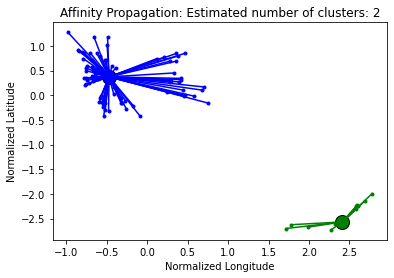

In [9]:
#Affinity Propagation in Normalized units
centers = [[-100, 30], [-102, 33], [-105, 36]]
lst=list()
w=0
for w in range(0, len(df)-1):
    lst+=[[df['Porosity'].iloc[w],df['AI'].iloc[w]]]
X = StandardScaler().fit_transform(lst)        
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Affinity Propagation: Estimated number of clusters: %d" % n_clusters_)
plt.ylabel("Normalized Latitude")
plt.xlabel("Normalized Longitude")
plt.show()

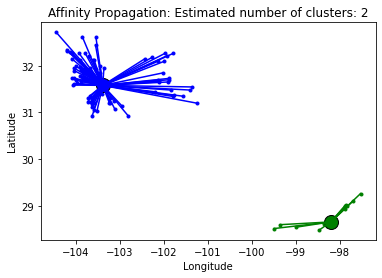

In [10]:
#Affinity Propagation in Original units
X_orig= list()
Y_orig=list()

for val in lst:
    X_orig+=[val[0]]
    Y_orig+=[val[1]]
  
X=np.array(lst)       
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Affinity Propagation: Estimated number of clusters: %d" % n_clusters_)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

### Results

An overall comparision of the three clustering rtechniques:

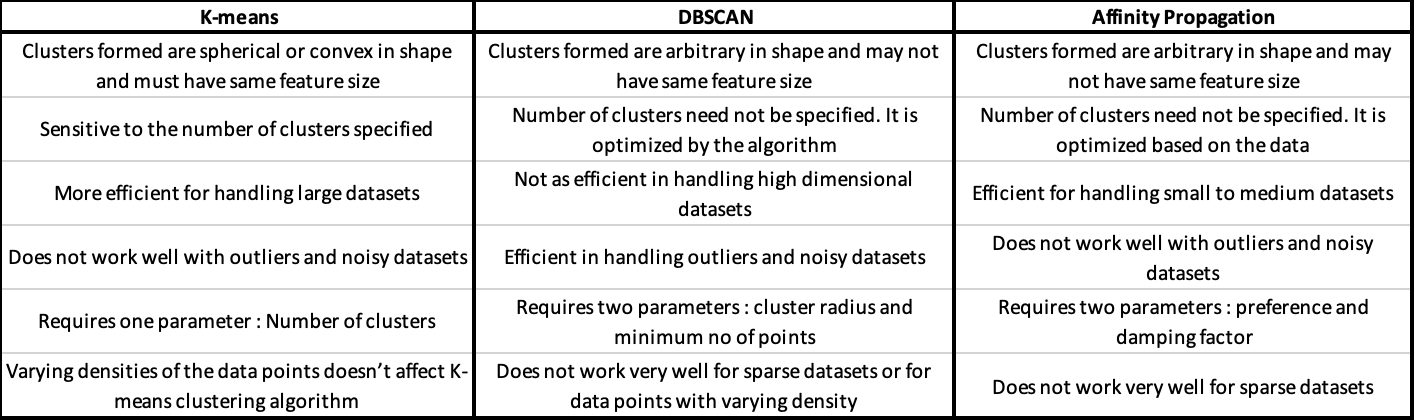

#### Based on the above characteristics specified for each method, user can select the best method for clustering their dataset.

### References

References:

https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31

https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/

https://www.ritchievink.com/blog/2018/05/18/algorithm-breakdown-affinity-propagation/

Code references:

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html#sphx-glr-auto-examples-cluster-plot-affinity-propagation-py


I hope this was helpful,

[Anu Radhakrishnan](https://www.linkedin.com/in/anuradha495/)

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
